In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, show
import altair as alt
from yellowbrick import *
from wordcloud import WordCloud

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving Dropout Rate National_22.csv to Dropout Rate National_22.csv
Uploaded Dropout Rate National_22.csv with length 75426 bytes


## 2022

In [ ]:
import pandas as pd
df=pd.read_csv('Dropout Rate National_22.csv')
df.head(5)

,Location,Social Category,Primary Girls,Primary Boys,Primary Overall,Upper Primary Girls,Upper Primary Boys,Upper Primary Overall,Secondary Girls,Secondary Boys,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,All India,General,2.42,2.65,2.54,1.55,1.49,1.51,10.77,11.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All India,SC,1.40,1.52,1.46,3.80,3.33,3.56,12.03,13.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All India,ST,2.60,3.04,2.83,5.70,6.35,6.03,15.33,17.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,All India,OBC,0.43,0.57,0.51,3.57,2.44,2.99,12.59,13.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,All India,Overall,1.35,1.55,1.45,3.31,2.74,3.02,12.25,12.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


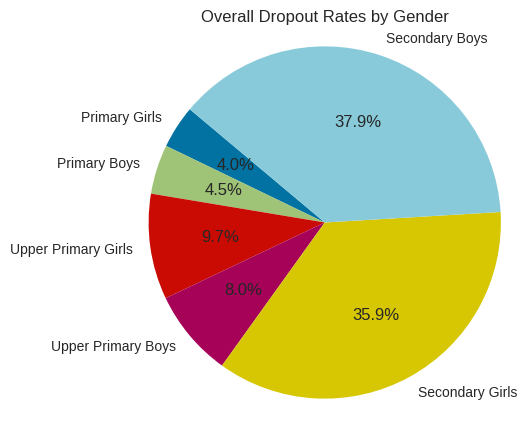

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Overall' social category
overall_dropout = df[df['Social Category'] == 'Overall']

# Create a list of gender labels
genders = ['Primary Girls', 'Primary Boys', 'Upper Primary Girls', 'Upper Primary Boys', 'Secondary Girls', 'Secondary Boys']

# Create a list of values corresponding to the genders
dropout_values = overall_dropout[genders].iloc[0]

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(dropout_values, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dropout Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


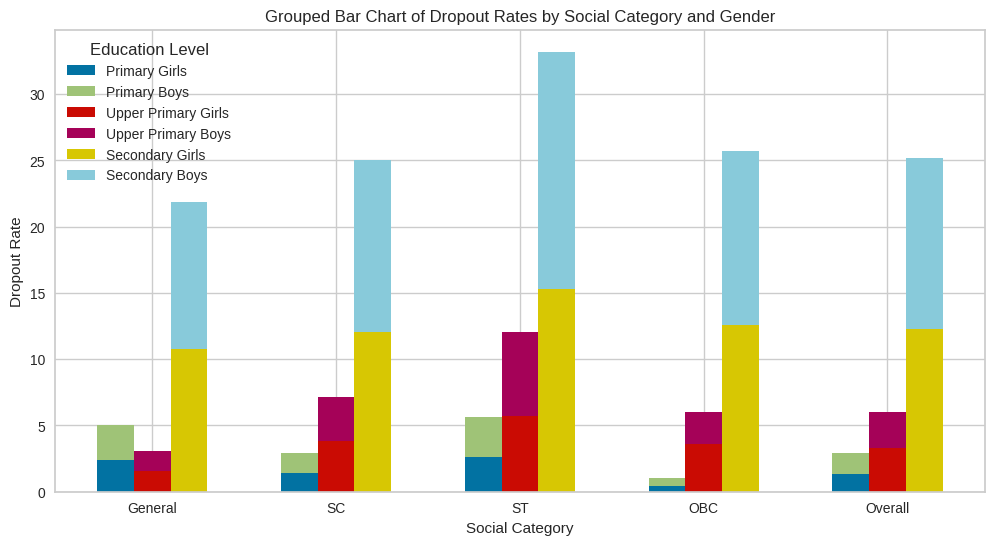

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Girls': [2.42, 1.4, 2.6, 0.43, 1.35],
    'Primary Boys': [2.65, 1.52, 3.04, 0.57, 1.55],
    'Upper Primary Girls': [1.55, 3.8, 5.7, 3.57, 3.31],
    'Upper Primary Boys': [1.49, 3.33, 6.35, 2.44, 2.74],
    'Secondary Girls': [10.77, 12.03, 15.33, 12.59, 12.25],
    'Secondary Boys': [11.09, 13.03, 17.87, 13.1, 12.96]
}

df = pd.DataFrame(data)

# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys', bottom=df[f'{edu_level} Girls'])

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()


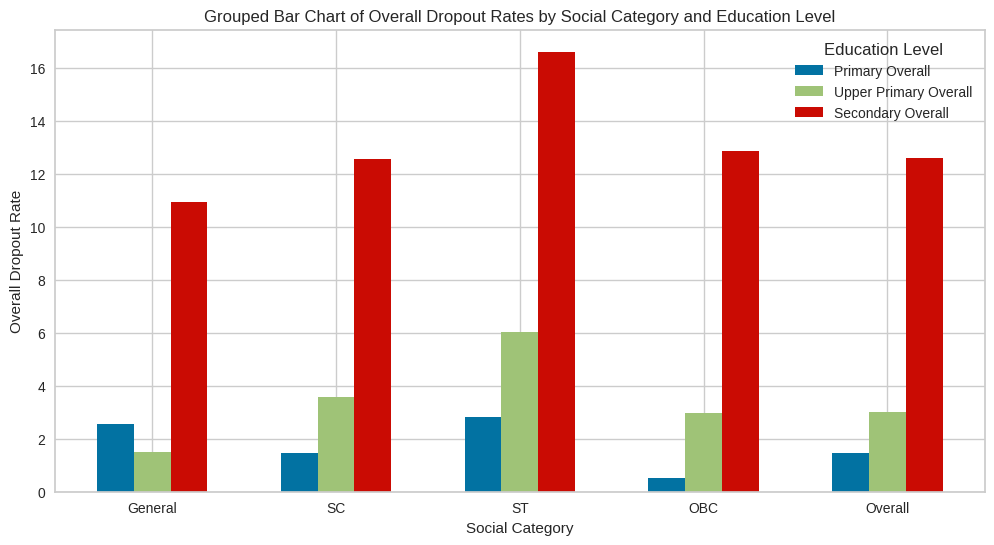

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Overall': [2.54, 1.46, 2.83, 0.51, 1.45],
    'Upper Primary Overall': [1.51, 3.56, 6.03, 2.99, 3.02],
    'Secondary Overall': [10.94, 12.55, 16.62, 12.87, 12.61]
}

df = pd.DataFrame(data)

# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart for Primary, Upper Primary, and Secondary overall dropout rates
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary Overall', 'Upper Primary Overall', 'Secondary Overall']):
    ax.bar([pos + width * i for pos in x], df[edu_level], width, label=f'{edu_level}')

ax.set_xlabel('Social Category')
ax.set_ylabel('Overall Dropout Rate')
ax.set_title('Grouped Bar Chart of Overall Dropout Rates by Social Category and Education Level')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()


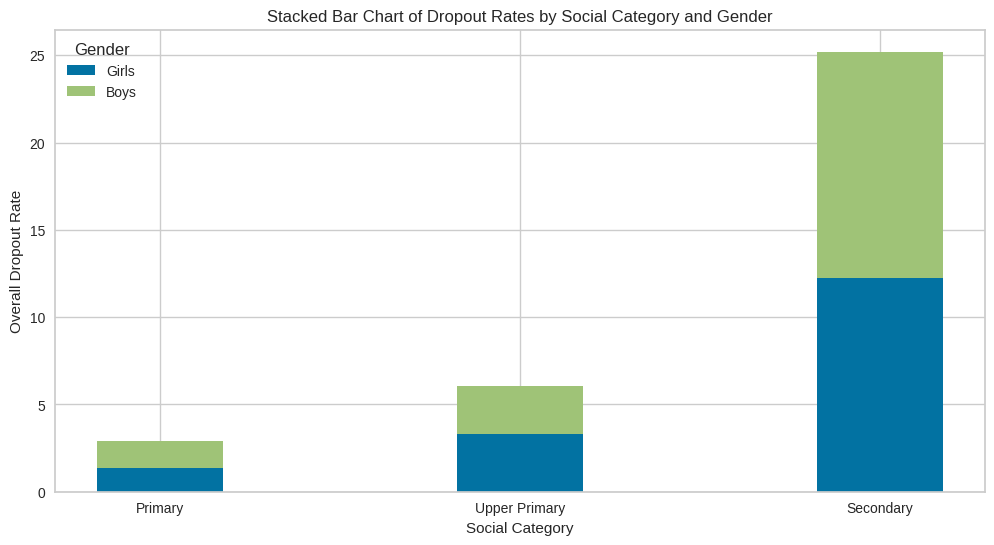

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the data for 'Overall' social category
overall_dropout = df[df['Social Category'] == 'Overall']

# Define the genders and categories
genders = ['Girls', 'Boys']
categories = ['Primary', 'Upper Primary', 'Secondary']

# Extract the dropout rates for each gender and category
dropout_data = overall_dropout[['Primary Girls', 'Primary Boys', 'Upper Primary Girls', 'Upper Primary Boys', 'Secondary Girls', 'Secondary Boys']].iloc[0].values.reshape(len(categories), len(genders))

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.35
x = np.arange(len(categories))

for i, gender in enumerate(genders):
    bottom = np.sum(dropout_data[:, :i], axis=1)
    ax.bar(x, dropout_data[:, i], width, label=f'{gender}', bottom=bottom)

ax.set_xlabel('Social Category')
ax.set_ylabel('Overall Dropout Rate')
ax.set_title('Stacked Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend(title='Gender')
plt.show()


## 2021

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving Dropout Rate National_21.csv to Dropout Rate National_21.csv
Uploaded Dropout Rate National_21.csv with length 493 bytes


In [ ]:
import pandas as pd
df=pd.read_csv('Dropout Rate National_21.csv')
df.head(5)

,Location,Social Category,Primary Girls,Primary Boys,Primary Overall,Upper Primary Girls,Upper Primary Boys,Upper Primary Overall,Secondary Girls,Secondary Boys,Secondary Overall,Unnamed: 11
0,All India,General,0.00,0.04,0.00,0.00,0.00,0.00,10.45,10.14,10.29,NaN
1,All India,SC,0.76,0.98,0.87,3.61,3.09,3.34,14.63,15.96,15.32,NaN
2,All India,ST,2.31,2.72,2.52,4.69,5.36,5.02,19.65,22.14,20.91,NaN
3,All India,OBC,0.73,0.77,0.75,3.33,2.07,2.69,14.08,14.70,14.41,NaN
4,All India,Overall,0.69,0.83,0.76,2.61,1.95,2.27,13.71,14.34,14.04,NaN


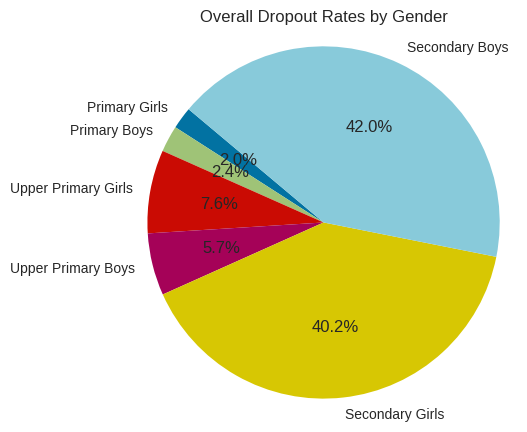

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Overall' social category
overall_dropout = df[df['Social Category'] == 'Overall']

# Create a list of gender labels
genders = ['Primary Girls', 'Primary Boys', 'Upper Primary Girls', 'Upper Primary Boys', 'Secondary Girls', 'Secondary Boys']

# Create a list of values corresponding to the genders
dropout_values = overall_dropout[genders].iloc[0]

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(dropout_values, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dropout Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


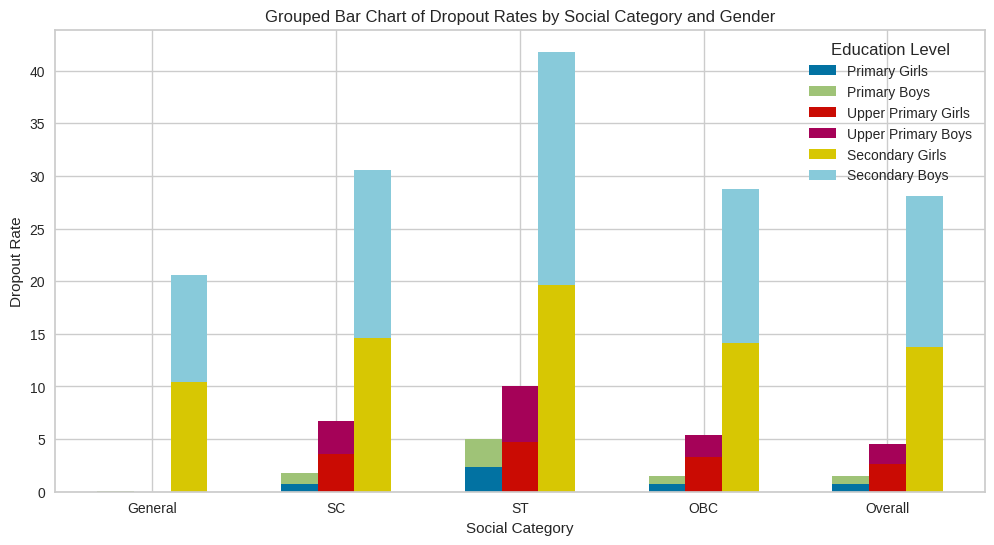

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the provided data
data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Girls': [0, 0.76, 2.31, 0.73, 0.69],
    'Primary Boys': [0.04, 0.98, 2.72, 0.77, 0.83],
    'Upper Primary Girls': [0, 3.61, 4.69, 3.33, 2.61],
    'Upper Primary Boys': [0, 3.09, 5.36, 2.07, 1.95],
    'Secondary Girls': [10.45, 14.63, 19.65, 14.08, 13.71],
    'Secondary Boys': [10.14, 15.96, 22.14, 14.7, 14.34]
}

df = pd.DataFrame(data)

# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys', bottom=df[f'{edu_level} Girls'])

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()


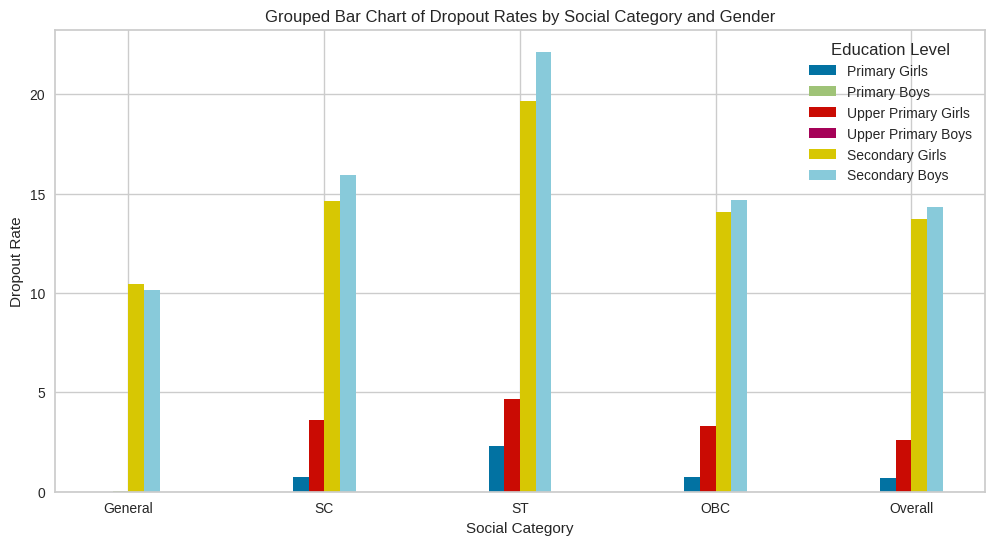

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the provided data
data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Girls': [0, 0.76, 2.31, 0.73, 0.69],
    'Primary Boys': [0.04, 0.98, 2.72, 0.77, 0.83],
    'Upper Primary Girls': [0, 3.61, 4.69, 3.33, 2.61],
    'Upper Primary Boys': [0, 3.09, 5.36, 2.07, 1.95],
    'Secondary Girls': [10.45, 14.63, 19.65, 14.08, 13.71],
    'Secondary Boys': [10.14, 15.96, 22.14, 14.7, 14.34]
}

df = pd.DataFrame(data)

# Set the width of the bars and the positions for each group
width = 0.08
x = np.arange(len(df['Social Category']))

# Create a grouped bar chart with bars placed side by side
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar(x - 1.5 * width + i * width, df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar(x - 0.5 * width + i * width, df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys')

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()


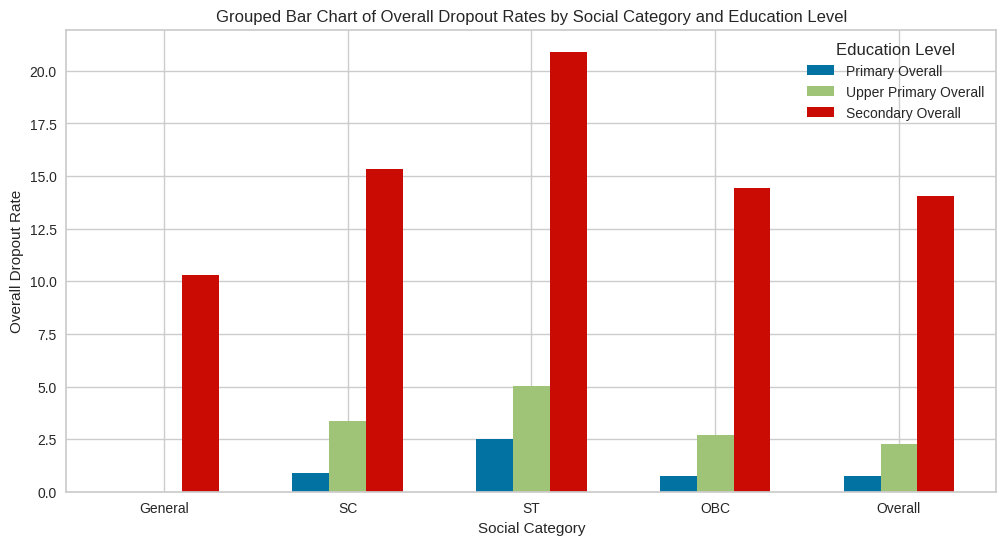

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the provided data
data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Overall': [0, 0.87, 2.52, 0.75, 0.76],
    'Upper Primary Overall': [0, 3.34, 5.02, 2.69, 2.27],
    'Secondary Overall': [10.29, 15.32, 20.91, 14.41, 14.04]
}

df = pd.DataFrame(data)

# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart for Primary, Upper Primary, and Secondary overall dropout rates
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary Overall', 'Upper Primary Overall', 'Secondary Overall']):
    ax.bar([pos + width * i for pos in x], df[edu_level], width, label=f'{edu_level}')

ax.set_xlabel('Social Category')
ax.set_ylabel('Overall Dropout Rate')
ax.set_title('Grouped Bar Chart of Overall Dropout Rates by Social Category and Education Level')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()


##2020

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving Dropout Rate National_20.csv to Dropout Rate National_20.csv
Uploaded Dropout Rate National_20.csv with length 492 bytes


In [ ]:
import pandas as pd
df=pd.read_csv('Dropout Rate National_20.csv')
df.head(5)

,Location,Social Category,Primary Girls,Primary Boys,Primary Overall,Upper Primary Girls,Upper Primary Boys,Upper Primary Overall,Secondary Girls,Secondary Boys,Secondary Overall
0,All India,General,0.32,0.72,0.53,0.07,0.00,0.00,10.26,11.59,10.95
1,All India,SC,1.62,2.01,1.82,4.14,3.40,3.75,17.39,19.81,18.65
2,All India,ST,3.61,4.06,3.85,5.81,6.30,6.06,22.65,25.64,24.18
3,All India,OBC,1.01,1.58,1.30,3.49,2.19,2.82,15.43,17.46,16.49
4,All India,Overall,1.24,1.70,1.48,2.98,2.24,2.60,15.07,17.02,16.09


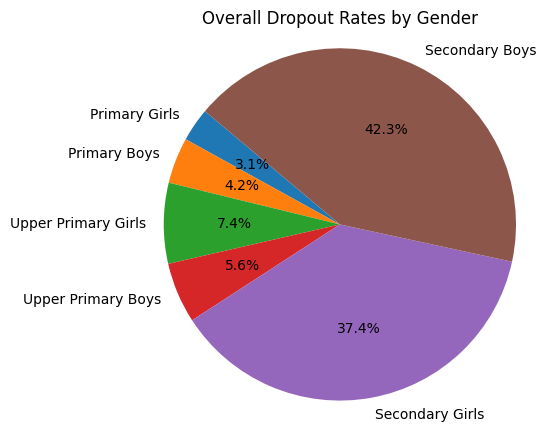

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Overall' social category
overall_dropout = df[df['Social Category'] == 'Overall']

# Create a list of gender labels
genders = ['Primary Girls', 'Primary Boys', 'Upper Primary Girls', 'Upper Primary Boys', 'Secondary Girls', 'Secondary Boys']

# Create a list of values corresponding to the genders
dropout_values = overall_dropout[genders].iloc[0]

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(dropout_values, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dropout Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


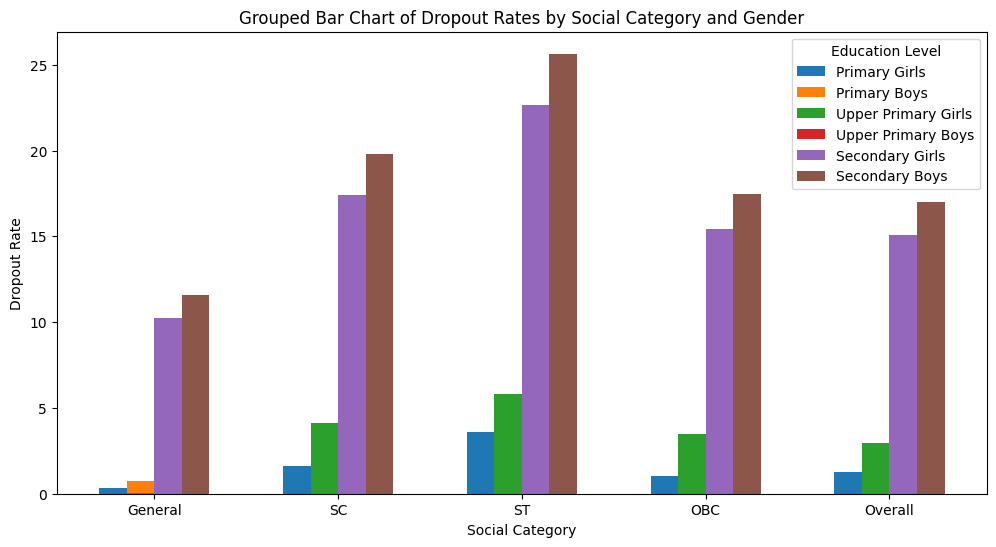

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame from the provided data
data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Girls': [0.32, 1.62, 3.61, 1.01, 1.24],
    'Primary Boys': [0.72, 2.01, 4.06, 1.58, 1.7],
    'Upper Primary Girls': [0.07, 4.14, 5.81, 3.49, 2.98],
    'Upper Primary Boys': [0, 3.4, 6.3, 2.19, 2.24],
    'Secondary Girls': [10.26, 17.39, 22.65, 15.43, 15.07],
    'Secondary Boys': [11.59, 19.81, 25.64, 17.46, 17.02]
}

df = pd.DataFrame(data)

# Set the width of the bars and the positions for each group
width = 0.15
x = np.arange(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar(x - 1.5 * width + i * width, df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar(x - 0.5 * width + i * width, df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys')

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()


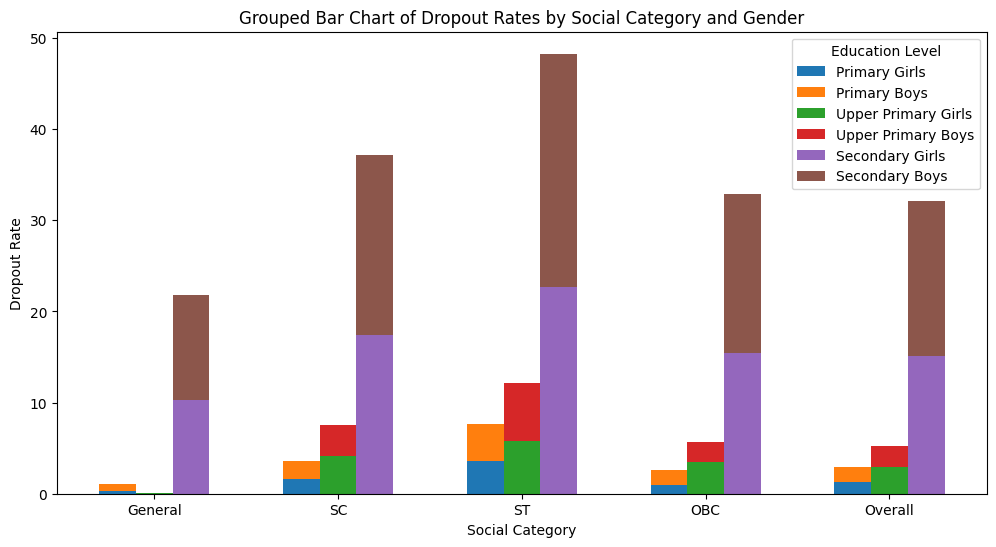

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the provided data
data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Girls': [0.32, 1.62, 3.61, 1.01, 1.24],
    'Primary Boys': [0.72, 2.01, 4.06, 1.58, 1.7],
    'Upper Primary Girls': [0.07, 4.14, 5.81, 3.49, 2.98],
    'Upper Primary Boys': [0, 3.4, 6.3, 2.19, 2.24],
    'Secondary Girls': [10.26, 17.39, 22.65, 15.43, 15.07],
    'Secondary Boys': [11.59, 19.81, 25.64, 17.46, 17.02]
}

df = pd.DataFrame(data)

# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys', bottom=df[f'{edu_level} Girls'])

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()


    Location Social Category  Primary Girls  Primary Boys  Primary Overall  \
0  All India         General           0.32          0.72             0.53   
1  All India              SC           1.62          2.01             1.82   
2  All India              ST           3.61          4.06             3.85   
3  All India             OBC           1.01          1.58             1.30   
4  All India         Overall           1.24          1.70             1.48   

   Upper Primary Girls  Upper Primary Boys  Upper Primary Overall  \
0                 0.07                0.00                   0.00   
1                 4.14                3.40                   3.75   
2                 5.81                6.30                   6.06   
3                 3.49                2.19                   2.82   
4                 2.98                2.24                   2.60   

   Secondary Girls  Secondary Boys  Secondary Overall  
0            10.26           11.59              10.95  
1   

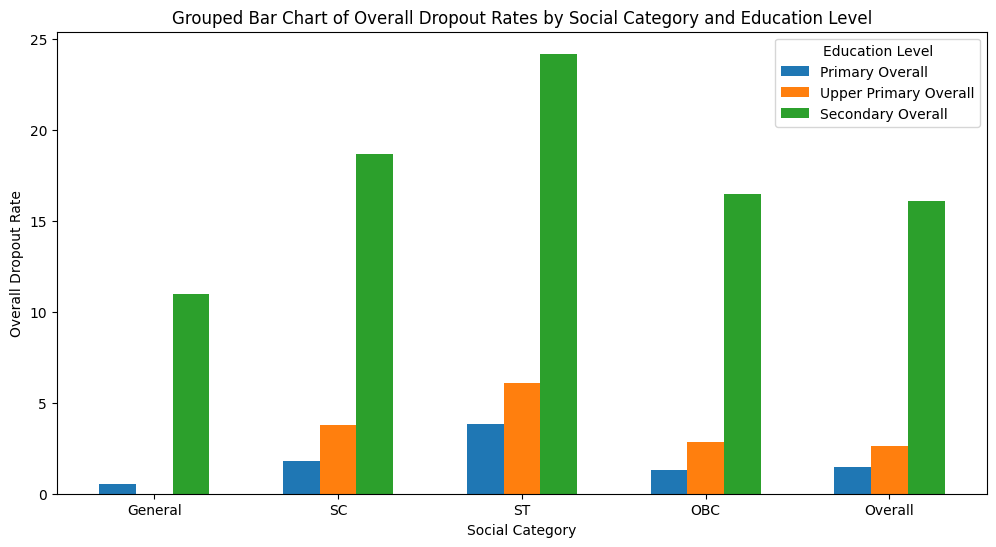

In [ ]:
# Create a DataFrame from the provided data
import pandas as pd

data = {
    'Location': ['All India', 'All India', 'All India', 'All India', 'All India'],
    'Social Category': ['General', 'SC', 'ST', 'OBC', 'Overall'],
    'Primary Girls': [0.32, 1.62, 3.61, 1.01, 1.24],
    'Primary Boys': [0.72, 2.01, 4.06, 1.58, 1.7],
    'Primary Overall': [0.53, 1.82, 3.85, 1.3, 1.48],
    'Upper Primary Girls': [0.07, 4.14, 5.81, 3.49, 2.98],
    'Upper Primary Boys': [0, 3.4, 6.3, 2.19, 2.24],
    'Upper Primary Overall': [0, 3.75, 6.06, 2.82, 2.6],
    'Secondary Girls': [10.26, 17.39, 22.65, 15.43, 15.07],
    'Secondary Boys': [11.59, 19.81, 25.64, 17.46, 17.02],
    'Secondary Overall': [10.95, 18.65, 24.18, 16.49, 16.09]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)


df = pd.DataFrame(data)
# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart for Primary, Upper Primary, and Secondary overall dropout rates
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary Overall', 'Upper Primary Overall', 'Secondary Overall']):
    ax.bar([pos + width * i for pos in x], df[edu_level], width, label=f'{edu_level}')

ax.set_xlabel('Social Category')
ax.set_ylabel('Overall Dropout Rate')
ax.set_title('Grouped Bar Chart of Overall Dropout Rates by Social Category and Education Level')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

## 2019

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving Dropout Rate National_19.csv to Dropout Rate National_19.csv
Uploaded Dropout Rate National_19.csv with length 503 bytes


In [ ]:
import pandas as pd
df=pd.read_csv('Dropout Rate National_19.csv')
df.head(5)

,Location,Social Category,Primary Girls,Primary Boys,Primary Overall,Upper Primary Girls,Upper Primary Boys,Upper Primary Overall,Secondary Girls,Secondary Boys,Secondary Overall,Unnamed: 11
0,All India,General,3.62,3.61,3.61,2.78,2.27,2.51,13.03,13.37,13.21,NaN
1,All India,SC,4.90,5.41,5.16,6.48,5.62,6.04,18.97,21.32,20.20,NaN
2,All India,ST,5.23,5.72,5.48,6.46,6.89,6.69,23.38,26.40,24.93,NaN
3,All India,OBC,4.18,4.54,4.37,5.60,4.22,4.89,17.38,19.26,18.38,NaN
4,All India,Overall,4.30,4.59,4.45,5.14,4.26,4.68,17.05,18.68,17.90,NaN


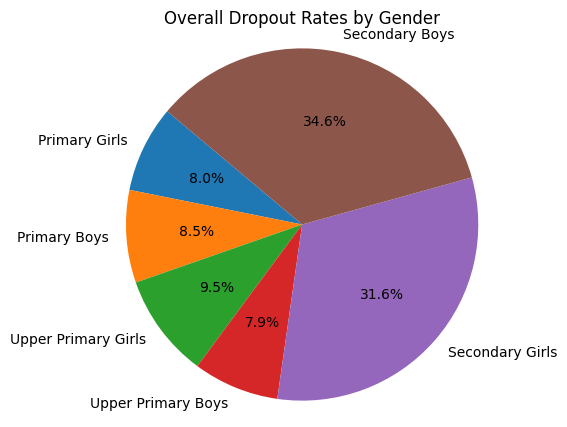

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Overall' social category
overall_dropout = df[df['Social Category'] == 'Overall']

# Create a list of gender labels
genders = ['Primary Girls', 'Primary Boys', 'Upper Primary Girls', 'Upper Primary Boys', 'Secondary Girls', 'Secondary Boys']

# Create a list of values corresponding to the genders
dropout_values = overall_dropout[genders].iloc[0]

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(dropout_values, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dropout Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


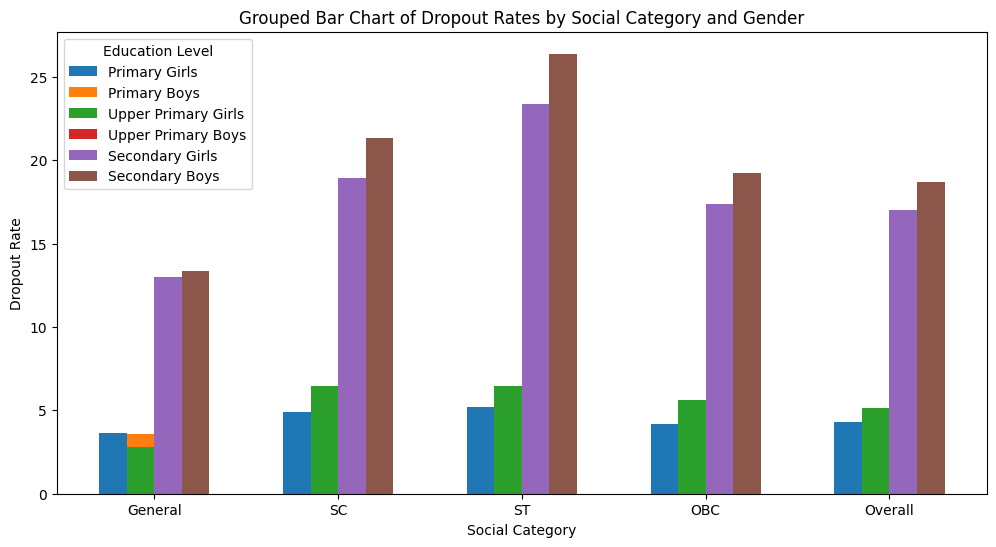

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.15
x = np.arange(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar(x - 1.5 * width + i * width, df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar(x - 0.5 * width + i * width, df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys')

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

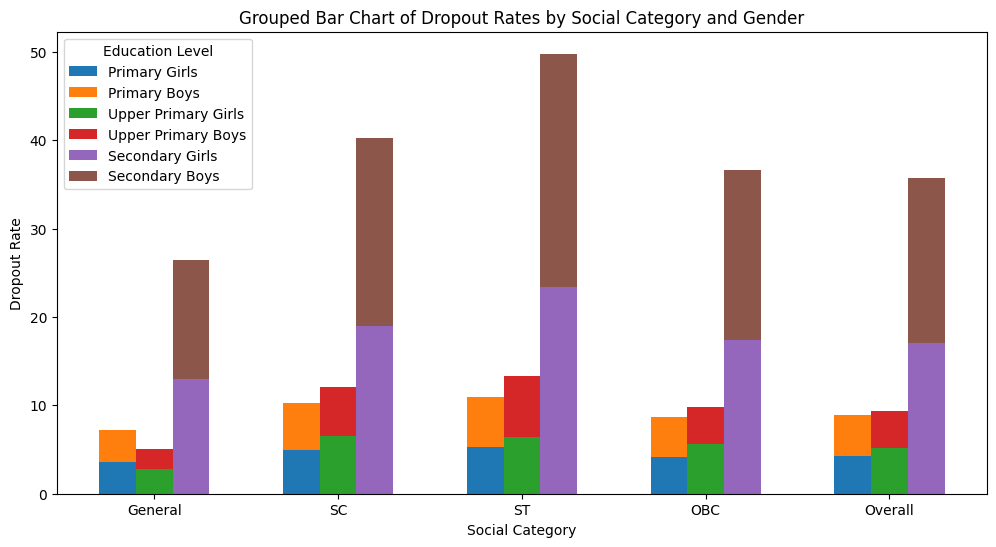

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys', bottom=df[f'{edu_level} Girls'])

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

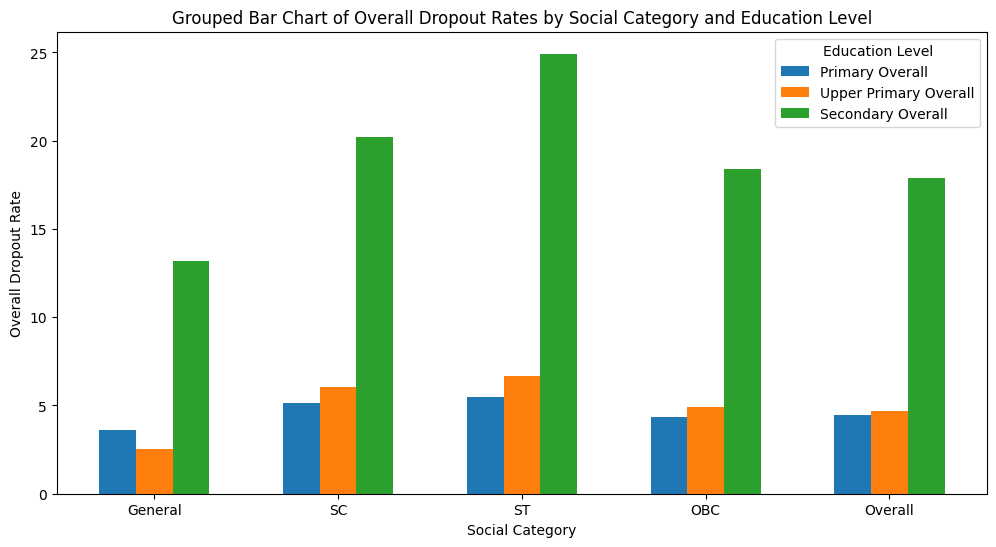

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart for Primary, Upper Primary, and Secondary overall dropout rates
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary Overall', 'Upper Primary Overall', 'Secondary Overall']):
    ax.bar([pos + width * i for pos in x], df[edu_level], width, label=f'{edu_level}')

ax.set_xlabel('Social Category')
ax.set_ylabel('Overall Dropout Rate')
ax.set_title('Grouped Bar Chart of Overall Dropout Rates by Social Category and Education Level')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

## 2018

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving Dropout Rate National_18.csv to Dropout Rate National_18.csv
Uploaded Dropout Rate National_18.csv with length 504 bytes


In [ ]:
import pandas as pd
df=pd.read_csv('Dropout Rate National_18.csv')
df.head(5)

,Location,Social Category,Primary Girls,Primary Boys,Primary Overall,Upper Primary Girls,Upper Primary Boys,Upper Primary Overall,Secondary Girls,Secondary Boys,Secondary Overall,Unnamed: 11
0,All India,General,1.53,2.25,1.91,3.00,2.74,2.87,14.81,15.07,14.94,NaN
1,All India,SC,4.73,4.98,4.85,7.14,6.07,6.59,21.47,22.05,21.77,NaN
2,All India,ST,3.48,3.82,3.66,6.14,5.95,6.04,21.36,22.90,22.14,NaN
3,All India,OBC,3.62,3.88,3.75,6.22,4.51,5.35,19.30,19.77,19.54,NaN
4,All India,Overall,3.33,3.68,3.51,5.57,4.49,5.02,18.66,19.16,18.93,NaN


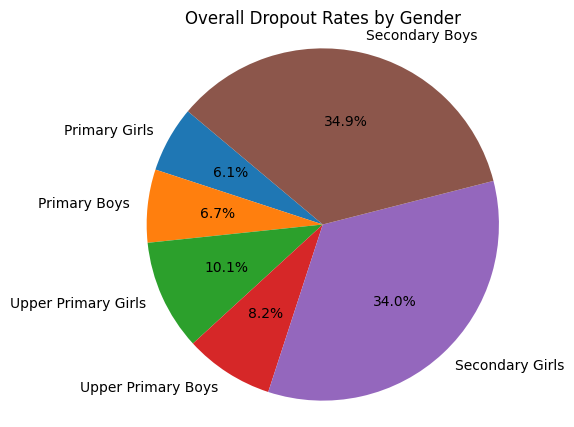

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Overall' social category
overall_dropout = df[df['Social Category'] == 'Overall']

# Create a list of gender labels
genders = ['Primary Girls', 'Primary Boys', 'Upper Primary Girls', 'Upper Primary Boys', 'Secondary Girls', 'Secondary Boys']

# Create a list of values corresponding to the genders
dropout_values = overall_dropout[genders].iloc[0]

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(dropout_values, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dropout Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


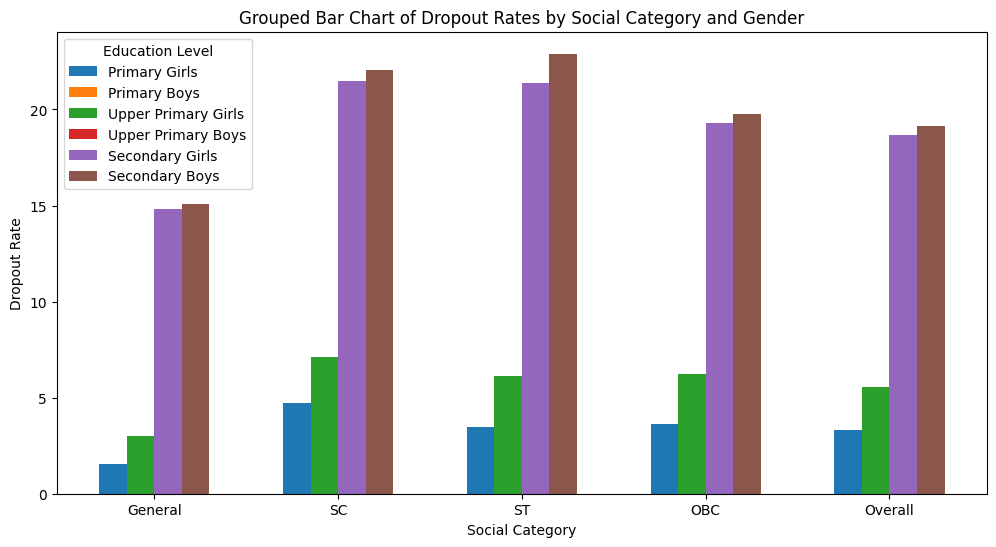

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.15
x = np.arange(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar(x - 1.5 * width + i * width, df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar(x - 0.5 * width + i * width, df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys')

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

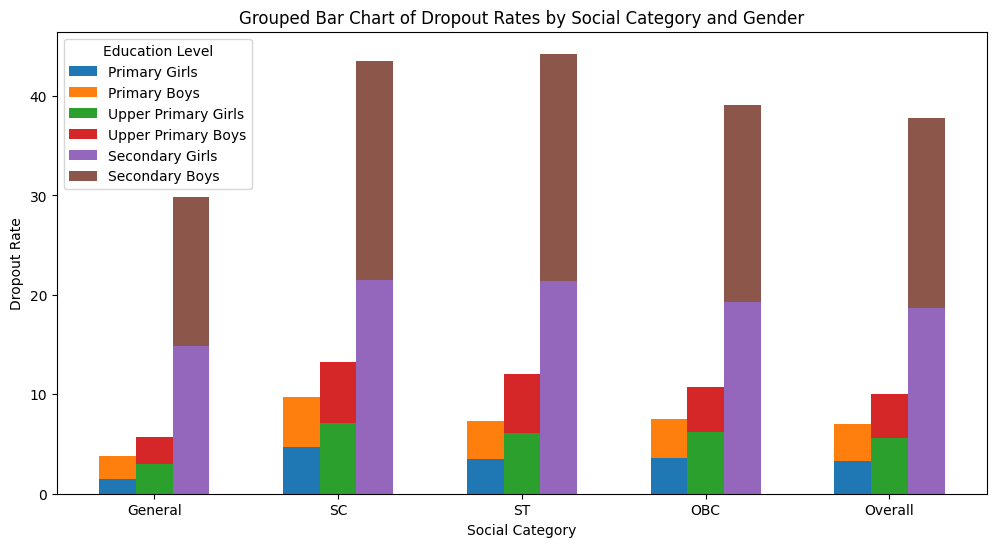

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys', bottom=df[f'{edu_level} Girls'])

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

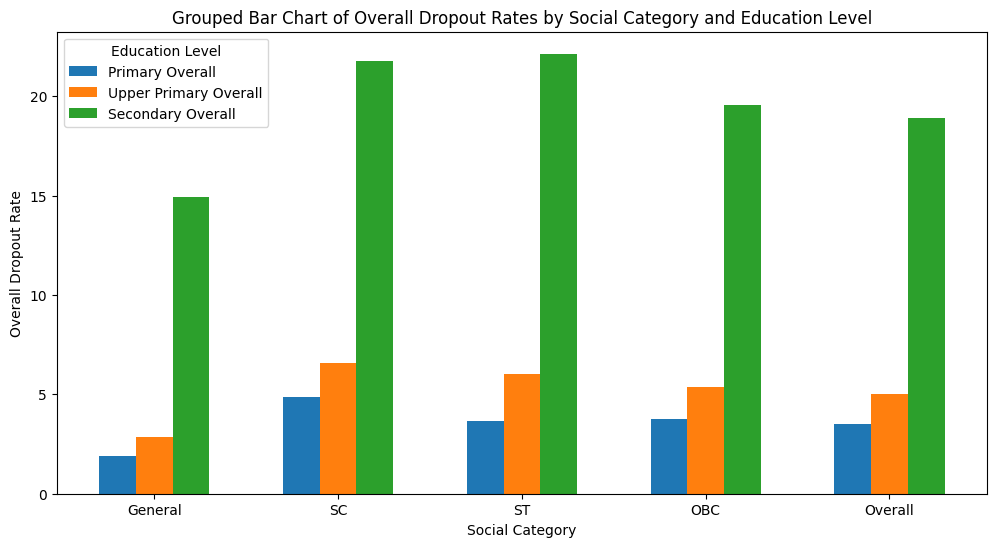

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart for Primary, Upper Primary, and Secondary overall dropout rates
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary Overall', 'Upper Primary Overall', 'Secondary Overall']):
    ax.bar([pos + width * i for pos in x], df[edu_level], width, label=f'{edu_level}')

ax.set_xlabel('Social Category')
ax.set_ylabel('Overall Dropout Rate')
ax.set_title('Grouped Bar Chart of Overall Dropout Rates by Social Category and Education Level')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

## 2017

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename, file_content in uploaded.items():
    print(f'Uploaded {filename} with length {len(file_content)} bytes')

Saving Dropout Rate National_17.csv to Dropout Rate National_17.csv
Uploaded Dropout Rate National_17.csv with length 503 bytes


In [ ]:
import pandas as pd
df=pd.read_csv('Dropout Rate National_17.csv')
df.head(5)

,Location,Social Category,Primary Girls,Primary Boys,Primary Overall,Upper Primary Girls,Upper Primary Boys,Upper Primary Overall,Secondary Girls,Secondary Boys,Secondary Overall,Unnamed: 11
0,All India,General,4.96,4.47,4.71,4.27,2.88,3.55,17.84,16.57,17.17,NaN
1,All India,SC,7.87,8.30,8.08,8.30,7.48,7.87,24.27,25.16,24.73,NaN
2,All India,ST,8.52,8.57,8.54,9.70,9.46,9.58,28.11,28.93,28.53,NaN
3,All India,OBC,5.79,6.09,5.95,6.10,4.09,5.08,22.78,22.97,22.88,NaN
4,All India,Overall,6.30,6.40,6.35,6.42,4.97,5.68,22.15,22.11,22.13,NaN


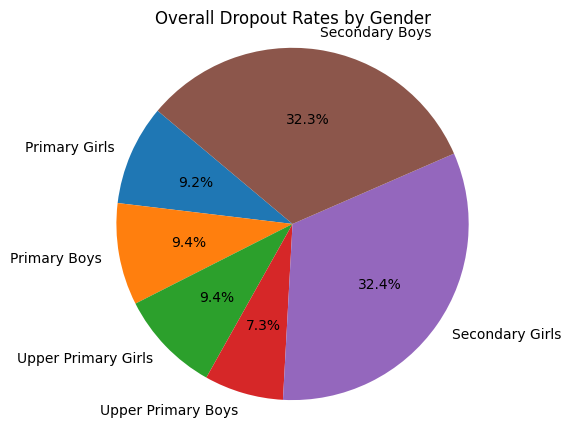

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for 'Overall' social category
overall_dropout = df[df['Social Category'] == 'Overall']

# Create a list of gender labels
genders = ['Primary Girls', 'Primary Boys', 'Upper Primary Girls', 'Upper Primary Boys', 'Secondary Girls', 'Secondary Boys']

# Create a list of values corresponding to the genders
dropout_values = overall_dropout[genders].iloc[0]

# Create a pie chart using Matplotlib
plt.figure(figsize=(5, 5))
plt.pie(dropout_values, labels=genders, autopct='%1.1f%%', startangle=140)
plt.title('Overall Dropout Rates by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


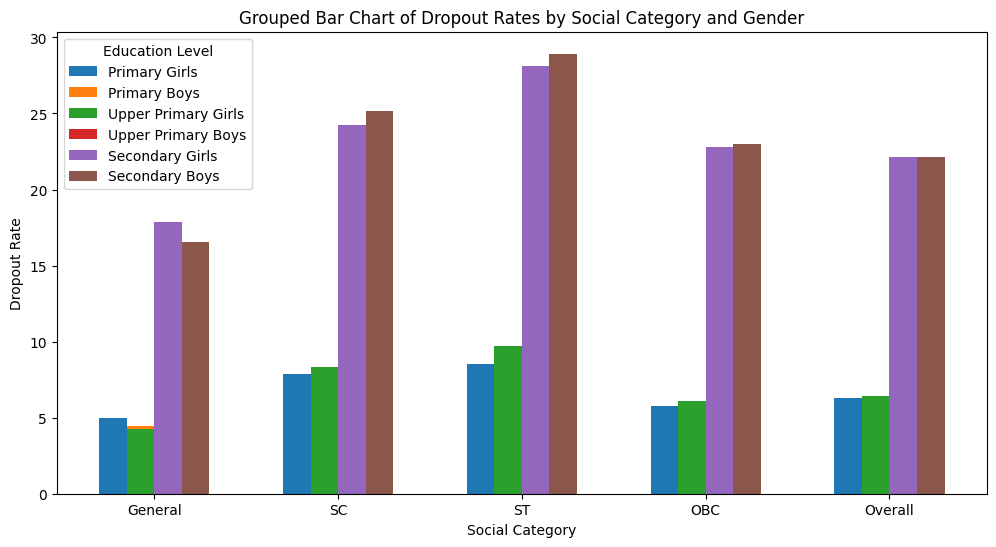

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.15
x = np.arange(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar(x - 1.5 * width + i * width, df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar(x - 0.5 * width + i * width, df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys')

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks(x)
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

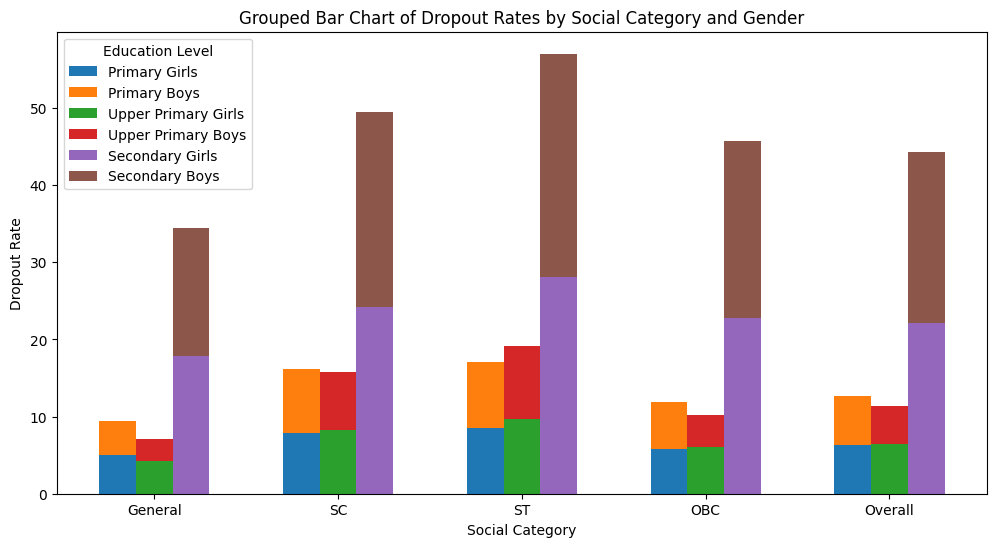

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary', 'Upper Primary', 'Secondary']):
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Girls'], width, label=f'{edu_level} Girls')
    ax.bar([pos + width * i for pos in x], df[f'{edu_level} Boys'], width, label=f'{edu_level} Boys', bottom=df[f'{edu_level} Girls'])

ax.set_xlabel('Social Category')
ax.set_ylabel('Dropout Rate')
ax.set_title('Grouped Bar Chart of Dropout Rates by Social Category and Gender')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()

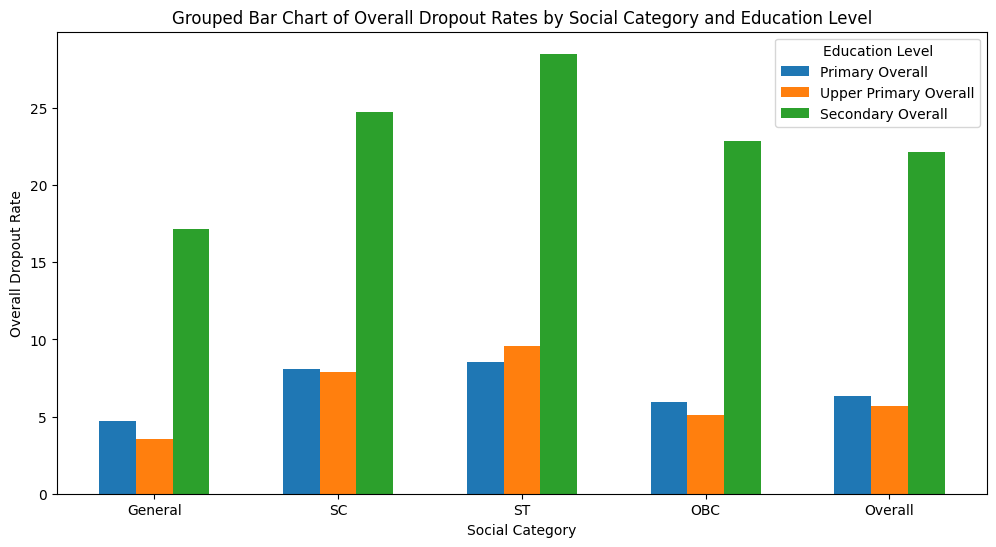

In [ ]:
# Set the width of the bars and the positions for each group
width = 0.2
x = range(len(df['Social Category']))

# Create a grouped bar chart for Primary, Upper Primary, and Secondary overall dropout rates
fig, ax = plt.subplots(figsize=(12, 6))

for i, edu_level in enumerate(['Primary Overall', 'Upper Primary Overall', 'Secondary Overall']):
    ax.bar([pos + width * i for pos in x], df[edu_level], width, label=f'{edu_level}')

ax.set_xlabel('Social Category')
ax.set_ylabel('Overall Dropout Rate')
ax.set_title('Grouped Bar Chart of Overall Dropout Rates by Social Category and Education Level')
ax.set_xticks([pos + width for pos in x])
ax.set_xticklabels(df['Social Category'])
ax.legend(title='Education Level')
plt.show()